In [ ]:
cd ..

In [2]:
mkdir -p figures/fig5

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
endpoint_df = pd.read_excel('data/Reutropha/JP_Reutropha_endpoint.xlsx')
endpoint_df['CO2_str'] = ['{0:.2g}%'.format(100*v) for v in endpoint_df['CO2']]
endpoint_df

,strain_name,strain,plasmid,CO2,inducer,induction,time_hrs,OD550,OD600,CO2_str
0,WT:pRFP,WT,pRFP,0.0005,arabinose,0.000,48,0.130,0.11180,0.05%
1,WT:pRFP,WT,pRFP,0.0005,arabinose,0.000,48,0.163,0.14018,0.05%
2,WT:pRFP,WT,pRFP,0.0005,arabinose,0.000,48,0.169,0.14534,0.05%
3,WT:pdab2,WT,pdab2,0.0005,arabinose,0.002,48,0.055,0.04730,0.05%
4,WT:pdab2,WT,pdab2,0.0005,arabinose,0.002,48,0.049,0.04214,0.05%
5,WT:pdab2,WT,pdab2,0.0005,arabinose,0.002,48,0.057,0.04902,0.05%
6,∆caa∆can:pRFP,∆caa∆can,pRFP,0.0005,arabinose,0.000,48,0.014,0.01204,0.05%
7,∆caa∆can:pRFP,∆caa∆can,pRFP,0.0005,arabinose,0.000,48,0.018,0.01548,0.05%
8,∆caa∆can:pRFP,∆caa∆can,pRFP,0.0005,arabinose,0.000,48,0.020,0.01720,0.05%
9,∆caa∆can:pdab2,∆caa∆can,pdab2,0.0005,arabinose,0.002,48,0.182,0.15652,0.05%


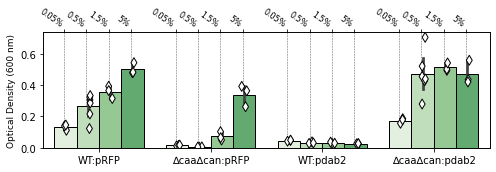

In [5]:
greys = sns.color_palette('Greys')
greens = sns.color_palette('Greens')
plt.figure(figsize=(7,2.5))

CO2_order = '0.05%,0.5%,1.5%,5%'.split(',')
strains = 'WT:pRFP,∆caa∆can:pRFP,WT:pdab2,∆caa∆can:pdab2'.split(',')
ax = sns.barplot(data=endpoint_df, y='OD600', x='strain_name', hue='CO2_str', order=strains, hue_order=CO2_order,
                 dodge=0.5, edgecolor='k', palette=greens)

strip_pal = ['w']*4
sns.stripplot(data=endpoint_df, y='OD600', x='strain_name', hue='CO2_str', order=strains, hue_order=CO2_order, dodge=0.5,
              size=7, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)

plt.legend().set_visible(False)
plt.ylabel('Optical Density (600 nm)', fontsize=9)
plt.xlabel('')
plt.xticks()

xticks = np.arange(0, 0.8, 0.2) - 0.3125
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3])
xtick_str = CO2_order*4
for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])

axT = ax.twiny()
plt.sca(axT)
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=8)
plt.tick_params(pad=0)
plt.xlim(ax.get_xlim())

plt.tight_layout()
plt.savefig('figures/fig5/fig5.png', dpi=600, facecolor='w')
plt.show()

In [6]:
# Kinetic data at 10% CO2.
kin_df = pd.read_excel('data/Reutropha/JP_Reutropha_kinetics_10pctCO2.xlsx')

# Making an endpoint figure from the kinetic data since the endpoint is very representative.
mask = kin_df.time_hrs > 30
kin_endpoint_df = kin_df[mask]
kin_endpoint_df.head()

,strain_name,strain,plasmid,time_hrs,OD600_mean,OD600_stddev,CO2,H2,O2,inducer,induction,antibiotic
11,∆caa∆can:pdab2,∆caa∆can,pdab2,31.0,1.100,0.130,0.1,0.8,0.1,arabinose,0.0,kanamycin
23,∆caa∆can:psbtA,∆caa∆can,psbtA,31.0,0.295,0.033,0.1,0.8,0.1,arabinose,0.0,kanamycin
35,∆caa∆can:pRFP,∆caa∆can,pRFP,31.0,1.220,0.097,0.1,0.8,0.1,arabinose,0.0,kanamycin
47,WT:pRFP,WT,pRFP,31.0,1.820,0.160,0.1,0.8,0.1,arabinose,0.0,kanamycin
59,∆caa:pRFP,∆caa,pRFP,31.0,1.090,0.130,0.1,0.8,0.1,arabinose,0.0,kanamycin


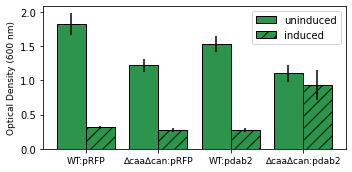

In [7]:
mask_induced = np.logical_and(kin_endpoint_df.induction > 0, kin_endpoint_df.antibiotic != 'omitted')
mask_uninduced = np.logical_and(kin_endpoint_df.induction == 0, kin_endpoint_df.antibiotic != 'omitted')
induced_df = kin_endpoint_df[mask_induced].set_index('strain_name')
uninduced_df = kin_endpoint_df[mask_uninduced].set_index('strain_name')

strains = 'WT:pRFP,∆caa∆can:pRFP,WT:pdab2,∆caa∆can:pdab2'.split(',')

heights_uninduced = uninduced_df.loc[strains].OD600_mean
err_uninduced = uninduced_df.loc[strains].OD600_stddev
heights_induced = induced_df.loc[strains].OD600_mean
err_induced = induced_df.loc[strains].OD600_stddev

plt.figure(figsize=(5,2.5))
ax = plt.gca()

xs = np.arange(4)
greens = sns.color_palette('Greens')
plt.bar(xs-0.2, heights_uninduced, yerr=err_uninduced, width=0.4, edgecolor='k', color=greens[-2], label='uninduced')
plt.bar(xs+0.2, heights_induced, yerr=err_induced, width=0.4, edgecolor='k', color=greens[-2], hatch='//', label='induced')
plt.xticks(xs, strains, fontsize=9)
plt.legend()
plt.ylabel('Optical Density (600 nm)', fontsize=9)

plt.tight_layout()
plt.savefig('figures/fig5/fig5_S1.png', dpi=600, facecolor='w')
plt.show()

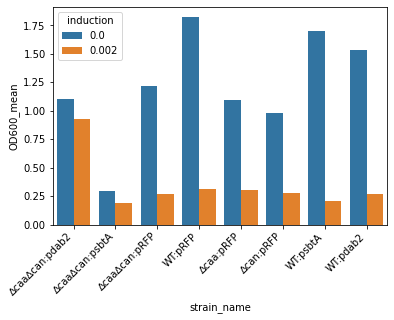

In [8]:
mask = kin_endpoint_df.antibiotic != 'omitted'
kin_subset_df = kin_endpoint_df[mask]

sns.barplot(data=kin_subset_df, x='strain_name', y='OD600_mean', hue='induction')
plt.xticks(rotation=45, ha='right')
plt.show()